In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/home/hemanth/Documents/XGBoosting/sdss_data.csv")

In [3]:
data.head()

,Unnamed: 0,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,class
0,0,0.693832,0.074025,0.000770,0.373281,0.490490,0.385886,0.069348,0.387685,2
1,1,0.694098,0.074642,0.000762,0.006999,0.540541,0.448110,0.215264,0.415556,2
2,2,0.694422,0.074519,0.023749,0.002579,0.512513,0.518964,0.154511,0.490959,0
3,3,0.695175,0.073487,0.000751,0.373281,0.509510,0.388785,0.279638,0.452852,2
4,4,0.695225,0.074199,0.000882,0.373281,0.511512,0.417103,0.357613,0.353918,2


In [4]:
data.tail()

,Unnamed: 0,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,class
9995,9995,0.487163,0.770000,0.005920,0.022225,0.245245,0.467976,0.203809,0.440477,0
9996,9996,0.487122,0.771783,0.022753,0.022225,0.227227,0.469694,0.263266,0.495585,0
9997,9997,0.488097,0.771724,0.000697,0.864072,0.621622,0.527653,0.260387,0.422956,2
9998,9998,0.487799,0.772888,0.003388,0.022225,0.228228,0.523447,0.230994,0.465101,0
9999,9999,0.488543,0.773595,0.022873,0.022225,0.232232,0.412978,0.097915,0.454926,0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.500000,2886.895680,0.0,2499.750000,4999.500000,7499.250000,9999.0
ra,10000.0,0.662163,0.189130,0.0,0.590288,0.681417,0.765140,1.0
dec,10000.0,0.273504,0.341052,0.0,0.065521,0.078279,0.555050,1.0
redshift,10000.0,0.027597,0.072560,0.0,0.000787,0.008721,0.018051,1.0
plate,10000.0,0.146732,0.219644,0.0,0.004298,0.021488,0.281557,1.0
fiberid,10000.0,0.352422,0.206505,0.0,0.185936,0.350350,0.509510,1.0
PCA_1,10000.0,0.457398,0.105448,0.0,0.392505,0.460267,0.524651,1.0
PCA_2,10000.0,0.218337,0.074867,0.0,0.163367,0.214737,0.267016,1.0
PCA_3,10000.0,0.455214,0.040324,0.0,0.432861,0.455051,0.478103,1.0
class,10000.0,0.915400,0.952856,0.0,0.000000,1.000000,2.000000,2.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   ra          10000 non-null  float64
 2   dec         10000 non-null  float64
 3   redshift    10000 non-null  float64
 4   plate       10000 non-null  float64
 5   fiberid     10000 non-null  float64
 6   PCA_1       10000 non-null  float64
 7   PCA_2       10000 non-null  float64
 8   PCA_3       10000 non-null  float64
 9   class       10000 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 781.4 KB


In [7]:
data.isna().sum()

Unnamed: 0    0
ra            0
dec           0
redshift      0
plate         0
fiberid       0
PCA_1         0
PCA_2         0
PCA_3         0
class         0
dtype: int64

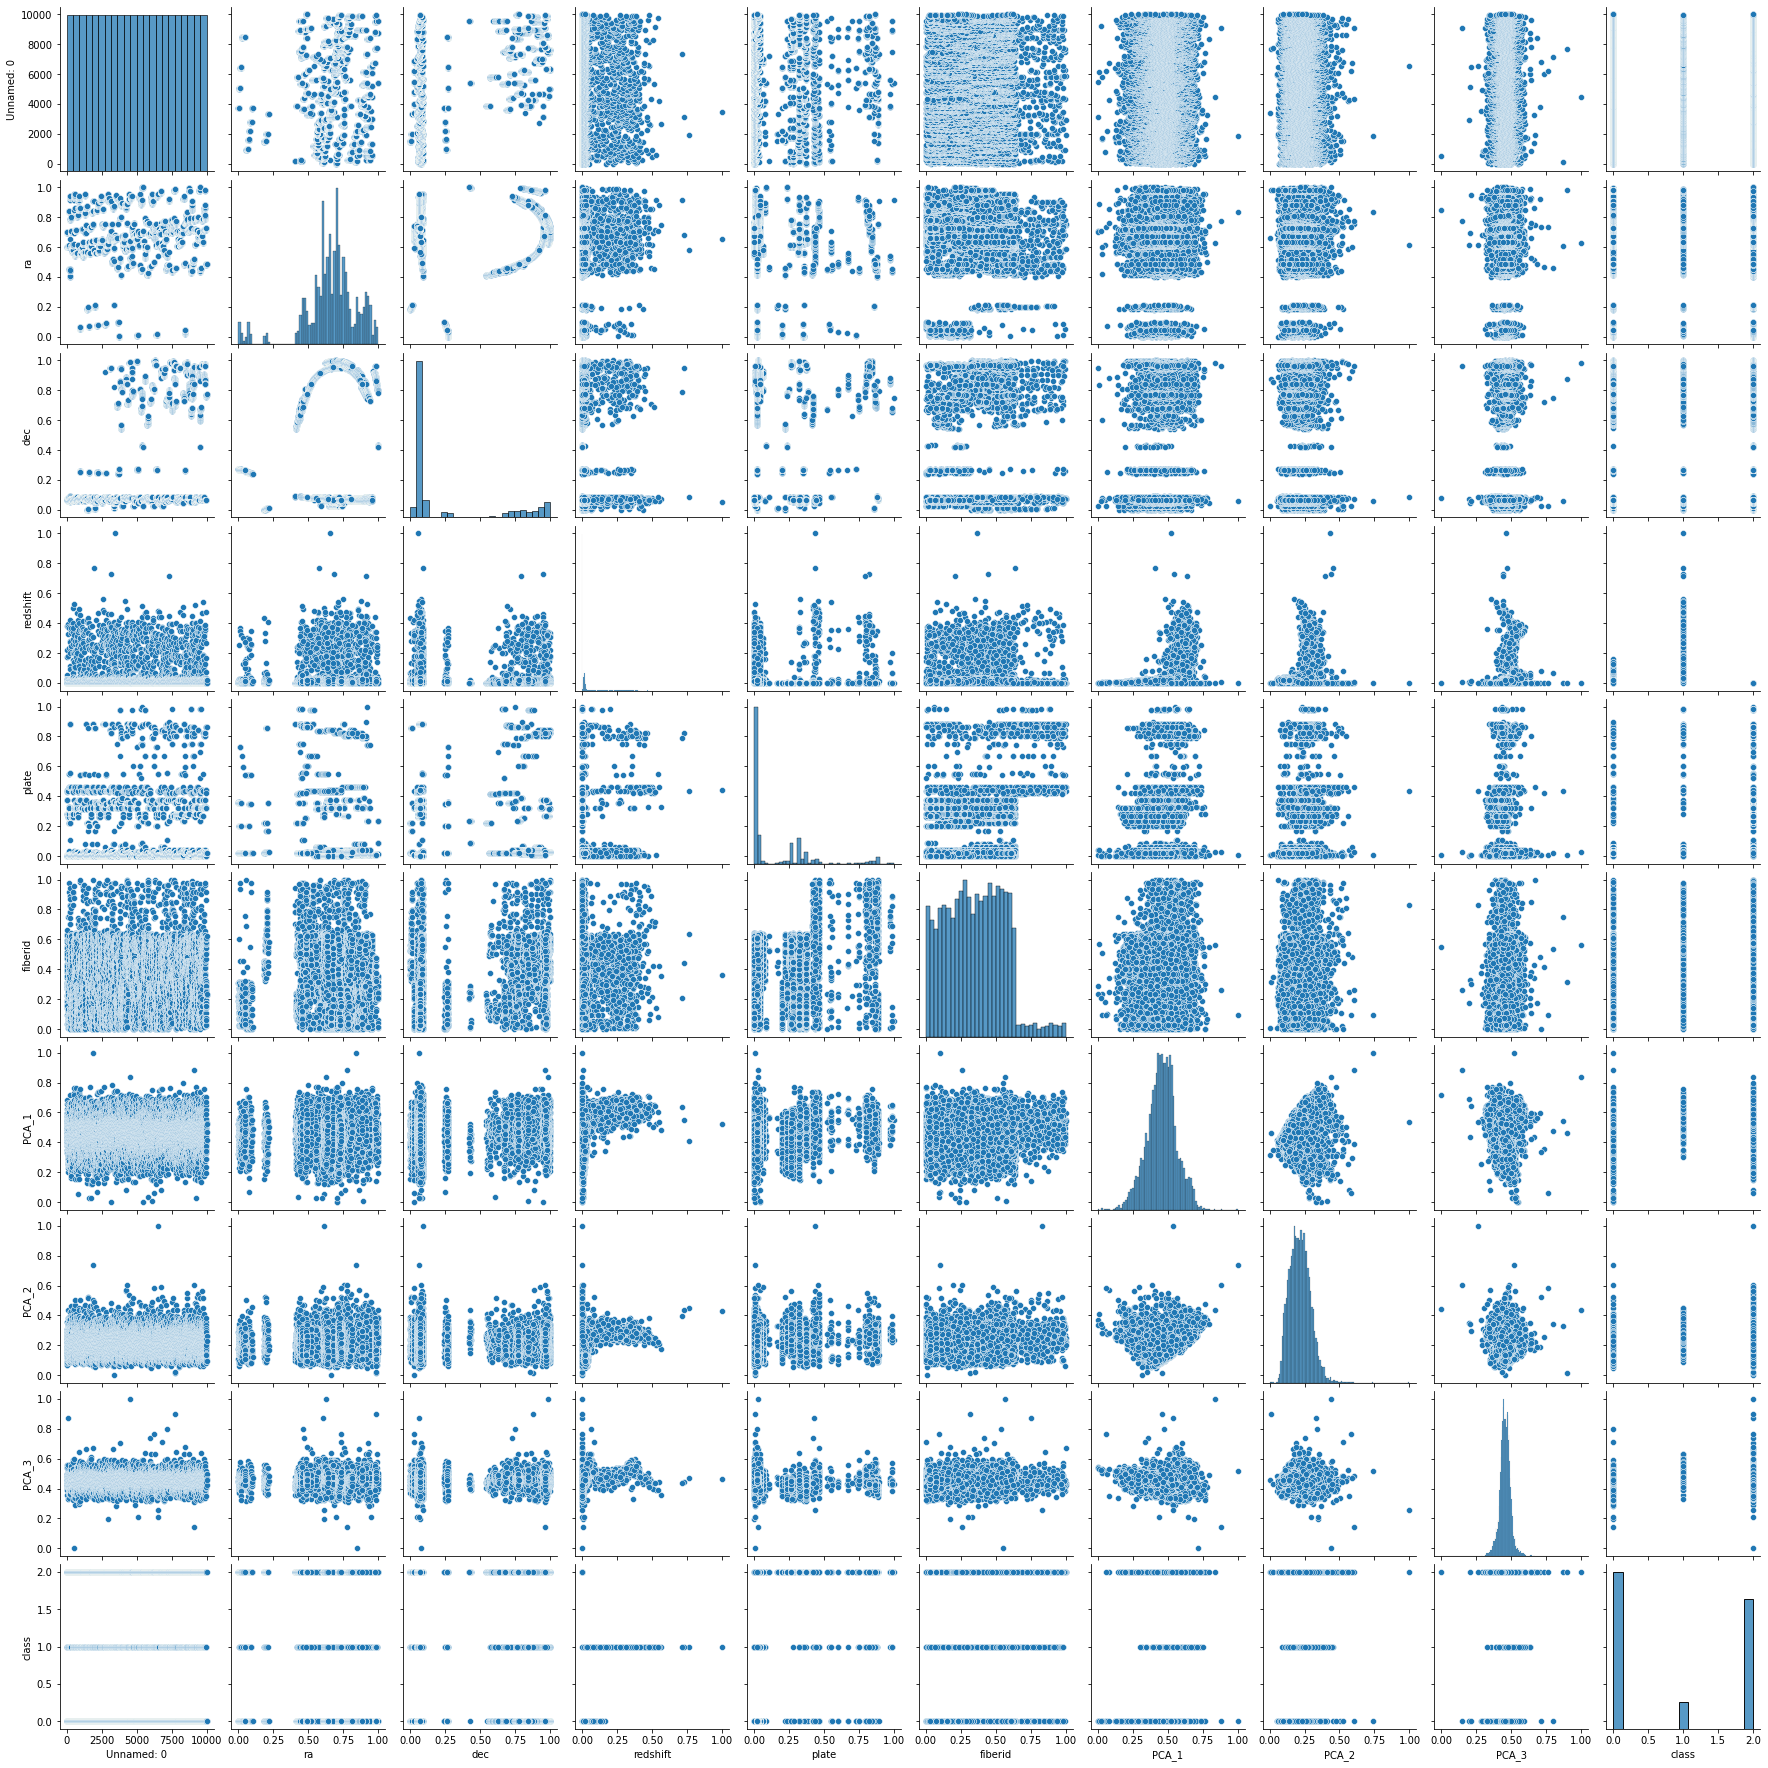

In [8]:
sns.pairplot(data)

In [9]:
data.columns

Index(['Unnamed: 0', 'ra', 'dec', 'redshift', 'plate', 'fiberid', 'PCA_1',
       'PCA_2', 'PCA_3', 'class'],
      dtype='object')

In [10]:
del data['Unnamed: 0']

In [11]:
x=data.drop(['class'],axis=1)

In [12]:
y=data['class']

<AxesSubplot:title={'center':'Original Distributions'}, xlabel='ra', ylabel='Density'>

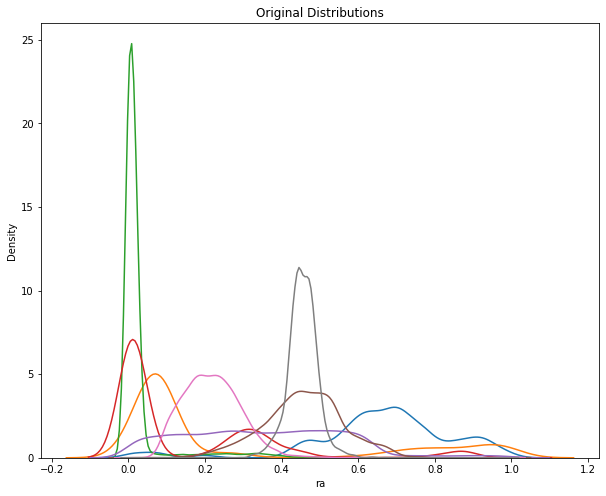

In [13]:
# plot original distribution plot with larger value feature
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(x['ra'], ax=ax1)
sns.kdeplot(x['dec'], ax=ax1)
sns.kdeplot(x['redshift'], ax=ax1)
sns.kdeplot(x['plate'], ax=ax1)
sns.kdeplot(x['fiberid'], ax=ax1)
sns.kdeplot(x['PCA_1'], ax=ax1)
sns.kdeplot(x['PCA_2'], ax=ax1)
sns.kdeplot(x['PCA_3'], ax=ax1)


# MinMax Scaller

In [14]:
col_names = list(x.columns)

<AxesSubplot:title={'center':'After MinMaxScaler'}, xlabel='ra', ylabel='Density'>

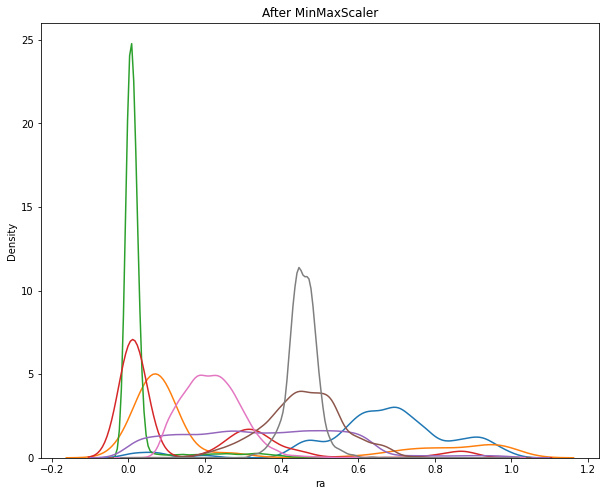

In [15]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(x)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['ra'], ax=ax1)
sns.kdeplot(df_mm['dec'], ax=ax1)
sns.kdeplot(df_mm['redshift'], ax=ax1)
sns.kdeplot(df_mm['plate'], ax=ax1)
sns.kdeplot(df_mm['fiberid'], ax=ax1)
sns.kdeplot(df_mm['PCA_1'], ax=ax1)
sns.kdeplot(df_mm['PCA_2'], ax=ax1)
sns.kdeplot(df_mm['PCA_3'], ax=ax1)


<AxesSubplot:>

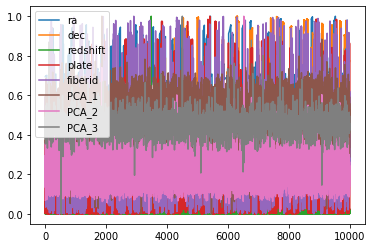

In [16]:
x.plot()

# RobustScaler

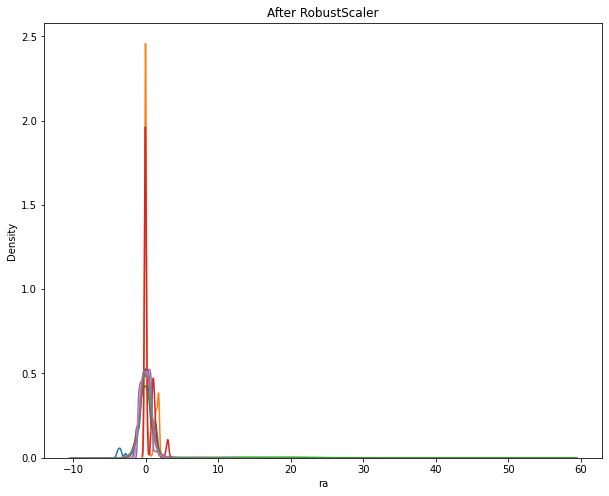

In [17]:
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(x)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After RobustScaler')

sns.kdeplot(df_r['ra'], ax=ax1)
sns.kdeplot(df_r['dec'], ax=ax1)
sns.kdeplot(df_r['redshift'], ax=ax1)
sns.kdeplot(df_r['plate'], ax=ax1)
sns.kdeplot(df_r['fiberid'], ax=ax1)
sns.kdeplot(df_r['PCA_1'], ax=ax1);
sns.kdeplot(df_r['PCA_2'], ax=ax1);
sns.kdeplot(df_r['PCA_3'], ax=ax1);

# StandardScaler

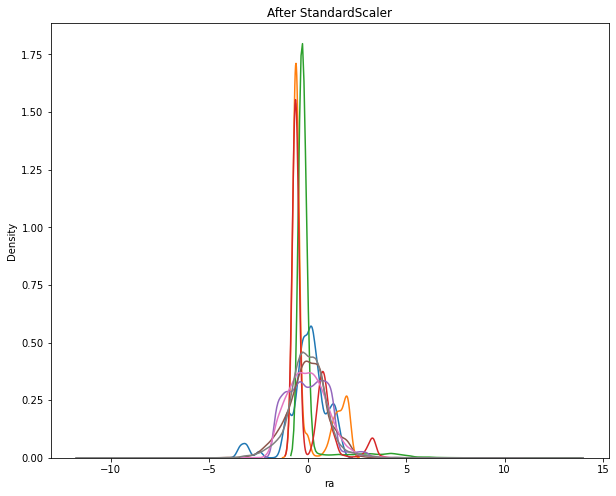

In [18]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(x)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')


sns.kdeplot(df_s['ra'], ax=ax1)
sns.kdeplot(df_s['dec'], ax=ax1)
sns.kdeplot(df_s['redshift'], ax=ax1)
sns.kdeplot(df_s['plate'], ax=ax1)
sns.kdeplot(df_s['fiberid'], ax=ax1)
sns.kdeplot(df_s['PCA_1'], ax=ax1);
sns.kdeplot(df_s['PCA_2'], ax=ax1);
sns.kdeplot(df_s['PCA_3'], ax=ax1);

# Normalization

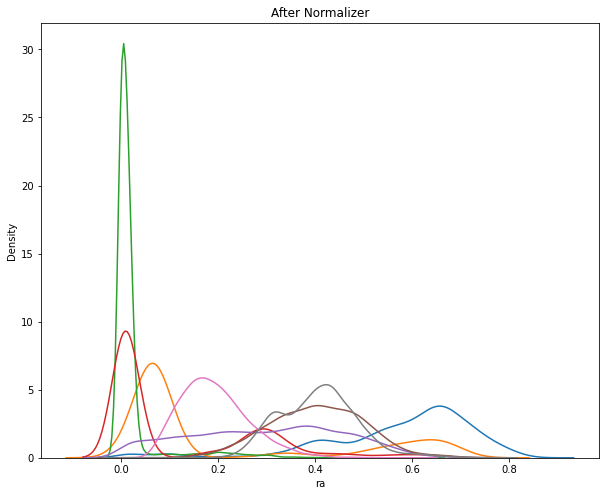

In [19]:
n_scaler = preprocessing.Normalizer()
df_n = n_scaler.fit_transform(x)

df_n = pd.DataFrame(df_n, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Normalizer')


sns.kdeplot(df_n['ra'], ax=ax1)
sns.kdeplot(df_n['dec'], ax=ax1)
sns.kdeplot(df_n['redshift'], ax=ax1)
sns.kdeplot(df_n['plate'], ax=ax1)
sns.kdeplot(df_n['fiberid'], ax=ax1)
sns.kdeplot(df_n['PCA_1'], ax=ax1);
sns.kdeplot(df_n['PCA_2'], ax=ax1);
sns.kdeplot(df_n['PCA_3'], ax=ax1);

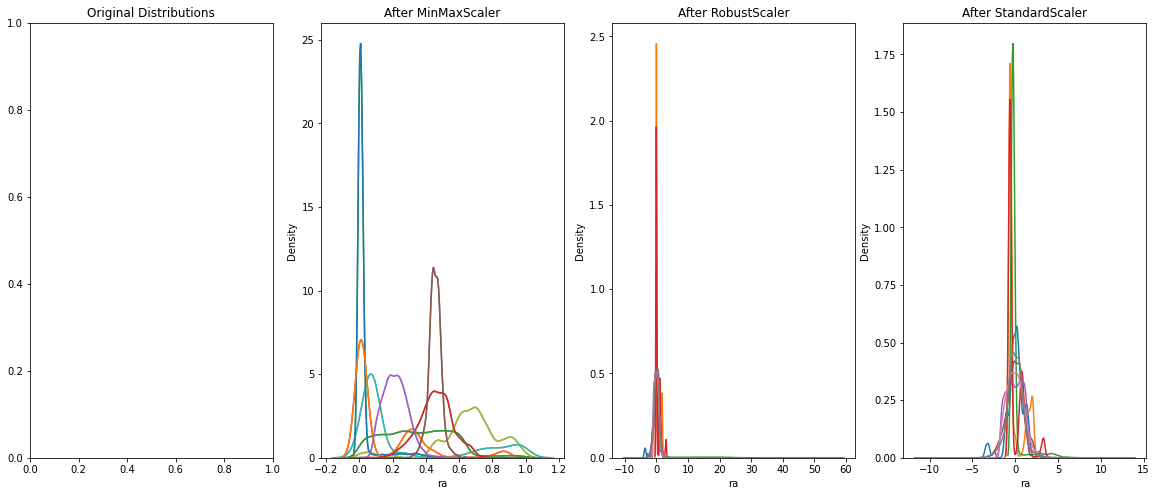

In [20]:
# Combined plot.

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 8))


ax0.set_title('Original Distributions')

sns.kdeplot(data['ra'], ax=ax1)
sns.kdeplot(data['dec'], ax=ax1)
sns.kdeplot(data['redshift'], ax=ax1)
sns.kdeplot(data['plate'], ax=ax1)
sns.kdeplot(data['fiberid'], ax=ax1);
sns.kdeplot(data['PCA_1'], ax=ax1);
sns.kdeplot(data['PCA_2'], ax=ax1);
sns.kdeplot(data['PCA_3'], ax=ax1);



ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['ra'], ax=ax1)
sns.kdeplot(df_mm['dec'], ax=ax1)
sns.kdeplot(df_mm['redshift'], ax=ax1)
sns.kdeplot(df_mm['plate'], ax=ax1)
sns.kdeplot(df_mm['fiberid'], ax=ax1)
sns.kdeplot(df_mm['PCA_1'], ax=ax1);
sns.kdeplot(df_mm['PCA_2'], ax=ax1);
sns.kdeplot(df_mm['PCA_3'], ax=ax1);



ax2.set_title('After RobustScaler')

sns.kdeplot(df_r['ra'], ax=ax2)
sns.kdeplot(df_r['dec'], ax=ax2)
sns.kdeplot(df_r['redshift'], ax=ax2)
sns.kdeplot(df_r['plate'], ax=ax2)
sns.kdeplot(df_r['fiberid'], ax=ax2)
sns.kdeplot(df_r['PCA_1'], ax=ax2);
sns.kdeplot(df_r['PCA_2'], ax=ax2);
sns.kdeplot(df_r['PCA_3'], ax=ax2);


ax3.set_title('After StandardScaler')

sns.kdeplot(df_s['ra'], ax=ax3)
sns.kdeplot(df_s['dec'], ax=ax3)
sns.kdeplot(df_s['redshift'], ax=ax3)
sns.kdeplot(df_s['plate'], ax=ax3)
sns.kdeplot(df_s['fiberid'], ax=ax3)
sns.kdeplot(df_s['PCA_1'], ax=ax3);
sns.kdeplot(df_s['PCA_2'], ax=ax3);
sns.kdeplot(df_s['PCA_3'], ax=ax3);

# Original_Dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)


In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7000, 8)
(3000, 8)
(7000,)
(3000,)


In [27]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [28]:
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
train_score=log.score(X_train,y_train)
train_score

0.922

In [30]:
test_score=log.score(X_test,y_test)
test_score

0.9216666666666666

In [31]:
logreg_predict= log.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
original_data=accuracy_score(logreg_predict,y_test)
original_data

0.9216666666666666

In [103]:
print(classification_report(logreg_predict,y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1588
           1       0.84      1.00      0.91       231
           2       0.89      0.95      0.92      1181

    accuracy                           0.92      3000
   macro avg       0.90      0.94      0.92      3000
weighted avg       0.93      0.92      0.92      3000



In [60]:
def plot_confusion_matrix(y_test, predict_y):
 C = confusion_matrix(y_test, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [0,1,2]
 cmap=sns.light_palette("#9370db")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

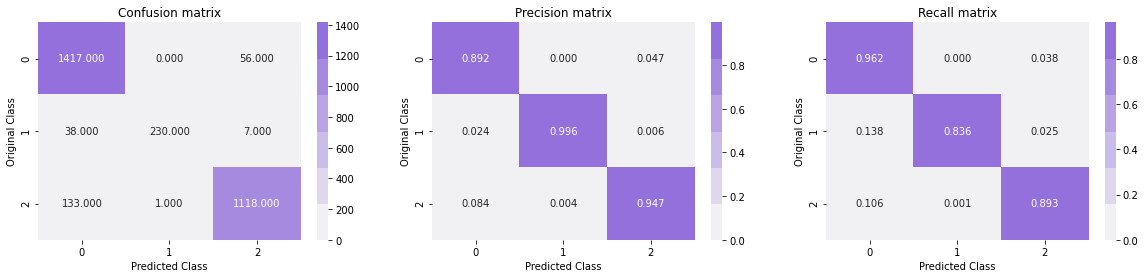

In [61]:
plot_confusion_matrix(y_test, logreg_predict)

In [62]:
data['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

# StandardScalerData

In [63]:
X_train,X_test,y_train,y_test=train_test_split(df_s,y,test_size=0.3,random_state=2)

In [64]:
log_s=LogisticRegression()

In [65]:
log_s.fit(X_train,y_train)

LogisticRegression()

In [66]:
train_score=log_s.score(X_train,y_train)
train_score

0.976

In [67]:
test_score=log_s.score(X_test,y_test)
test_score

0.9763333333333334

In [68]:
logreg_predict_St= log_s.predict(X_test)

In [104]:
st_scaler=accuracy_score(logreg_predict_St,y_test)
st_scaler

0.9763333333333334

In [70]:
print(classification_report(logreg_predict_St,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1466
           1       0.92      0.99      0.95       255
           2       0.99      0.97      0.98      1279

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



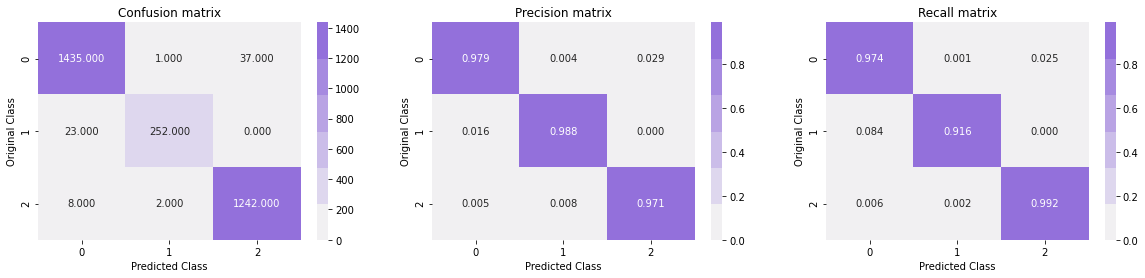

In [71]:
plot_confusion_matrix(y_test, logreg_predict_St)

In [72]:
df_s.head()

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3
0,0.167458,-0.584923,-0.369731,1.031489,0.668632,-0.678199,-1.990158,-1.674727
1,0.168862,-0.583114,-0.369849,-0.636213,0.911012,-0.088085,-0.041053,-0.983512
2,0.170574,-0.583475,-0.053027,-0.656339,0.775279,0.583885,-0.852570,0.886503
3,0.174558,-0.586501,-0.369993,1.031489,0.760736,-0.650712,0.818847,-0.058569
4,0.174825,-0.584412,-0.368189,1.031489,0.770431,-0.382148,1.860416,-2.512163


# RobustScaller

In [73]:
X_train,X_test,y_train,y_test=train_test_split(df_r,y,test_size=0.3,random_state=2)

In [74]:
log_r=LogisticRegression()

In [75]:
log_r.fit(X_train,y_train)

LogisticRegression()

In [76]:
train_score=log_r.score(X_train,y_train)
train_score

0.9854285714285714

In [77]:
test_score=log_r.score(X_test,y_test)
test_score

0.9846666666666667

In [78]:
logreg_predict_Rs=log_r.predict(X_test)

In [106]:
robust_scaler=accuracy_score(logreg_predict_Rs,y_test)
robust_scaler

0.9846666666666667

In [80]:
print(classification_report(logreg_predict_Rs,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1472
           1       0.92      0.99      0.95       256
           2       1.00      0.98      0.99      1272

    accuracy                           0.98      3000
   macro avg       0.97      0.99      0.98      3000
weighted avg       0.99      0.98      0.98      3000



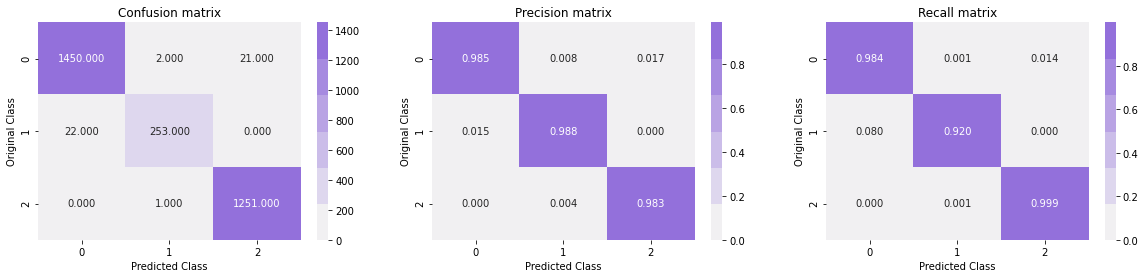

In [81]:
plot_confusion_matrix(y_test, logreg_predict_Rs)

# MinMax Scalling 

In [82]:
X_train,X_test,y_train,y_test=train_test_split(df_mm,y,test_size=0.3,random_state=2)

In [83]:
log_mm=LogisticRegression()

In [84]:
log_mm.fit(X_train,y_train)

LogisticRegression()

In [85]:
train_score=log_mm.score(X_train,y_train)
train_score

0.922

In [86]:
test_score=log_mm.score(X_test,y_test)
test_score

0.9216666666666666

In [87]:
logreg_predict_mm=log_mm.predict(X_test)

In [105]:
minmax_scaler=accuracy_score(logreg_predict_mm,y_test)
minmax_scaler

0.9216666666666666

In [89]:
print(classification_report(logreg_predict_mm,y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1588
           1       0.84      1.00      0.91       231
           2       0.89      0.95      0.92      1181

    accuracy                           0.92      3000
   macro avg       0.90      0.94      0.92      3000
weighted avg       0.93      0.92      0.92      3000



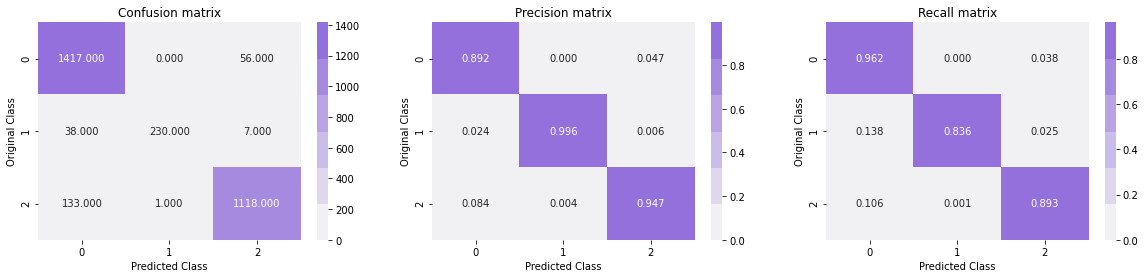

In [90]:
plot_confusion_matrix(y_test, logreg_predict_mm)

# Normalization_Data_Accuracy

In [91]:
X_train,X_test,y_train,y_test=train_test_split(df_n,y,test_size=0.3,random_state=2)

In [92]:
log_n=LogisticRegression()

In [93]:
log_n.fit(X_train,y_train)

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
train_score=log_n.score(X_train,y_train)
train_score

0.9078571428571428

In [95]:
test_score=log_n.score(X_test,y_test)
test_score

0.9003333333333333

In [97]:
logreg_predict_n=log_n.predict(X_test)

In [107]:
normal=accuracy_score(logreg_predict_n,y_test)
normal

0.9003333333333333

In [99]:
print(classification_report(logreg_predict_n,y_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1639
           1       0.72      0.99      0.84       200
           2       0.87      0.94      0.90      1161

    accuracy                           0.90      3000
   macro avg       0.85      0.93      0.88      3000
weighted avg       0.91      0.90      0.90      3000



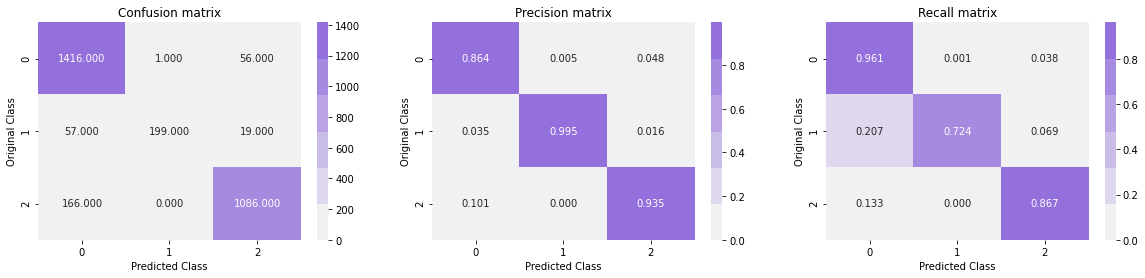

In [100]:
plot_confusion_matrix(y_test, logreg_predict_n)

In [111]:
pd.DataFrame({"Scalling Names":['original_data','Standardscaler','Robustscalar','MinMaxScalling','Normalization'],
            "Accuracy socre":[original_data,st_scaler,robust_scaler,minmax_scaler,normal]})

,Scalling Names,Accuracy socre
0,original_data,0.921667
1,Standardscaler,0.976333
2,Robustscalar,0.984667
3,MinMaxScalling,0.921667
4,Normalization,0.900333


In [114]:
df_r

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3
0,0.071007,-0.008690,-0.460549,1.268822,0.433101,-0.562869,-1.402704,-1.488991
1,0.072524,-0.007430,-0.461045,-0.052259,0.587780,-0.092002,0.005082,-0.872951
2,0.074377,-0.007681,0.870514,-0.068202,0.501160,0.444182,-0.581055,0.793688
3,0.078685,-0.009789,-0.461648,1.268822,0.491879,-0.540936,0.626164,-0.048601
4,0.078974,-0.008334,-0.454070,1.268822,0.498067,-0.326642,1.378462,-2.235351
...,...,...,...,...,...,...,...,...
9995,-1.110959,1.413031,-0.162250,0.002657,-0.324826,0.058336,-0.105432,-0.322130
9996,-1.111193,1.416673,0.812794,0.002657,-0.380510,0.071338,0.468203,0.895939
9997,-1.105614,1.416553,-0.464793,3.038973,0.838360,0.509930,0.440425,-0.709407
9998,-1.107321,1.418931,-0.308892,0.002657,-0.377417,0.478105,0.156846,0.222141


In [118]:
log_r.predict([[0.068974,-0.001334 ,-0.54070 ,1.8822 ,0.467 ,-0.42 ,1.462 ,-0.235351]])

array([2])

In [119]:
sample=pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":np.round(logreg_predict_Rs,2)})
sample

,Actual Rating,Predicted Rating
7878,0,0
3224,0,0
1919,0,0
4432,0,0
4835,0,0
...,...,...
6772,2,2
4048,2,2
623,0,0
9952,0,0


# Save Ratings Sample as a CSV file

In [120]:
sample.to_csv("Model Prediction Sample_ssds.csv",index=False)